## Pyber - Conclusions:
* Ride sharing service usage is more popular in urban areas. 
* The highest number of drivers (and the highest ride count) are in urban areas, followed respectively by suburban and rural.
* The fares are cheaper in urban areas, compared to rural and suburban, most likely due to a higher demand for the service.

In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [6]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, on="city", how="left")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

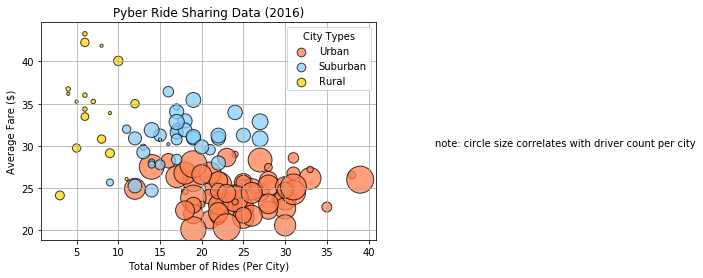

In [41]:
# Obtain the x and y coordinates for each of the three city types
#urban
urban = combined_df.loc[combined_df["type"] == "Urban"]
urban_rides = urban.groupby("city").count()["ride_id"]
urban_fares = urban.groupby("city").mean()["fare"]
#suburban
suburban = combined_df.loc[combined_df["type"] == "Suburban"]
suburban_rides = suburban.groupby("city").count()["ride_id"]
suburban_fares = suburban.groupby("city").mean()["fare"]
#rural
rural = combined_df.loc[combined_df["type"] == "Rural"]
rural_rides = rural.groupby("city").count()["ride_id"]
rural_fares = rural.groupby("city").mean()["fare"]



# Build the scatter plots for each city types
urbanplot = plt.scatter(urban_rides, urban_fares, marker="o", facecolors="coral", edgecolors="black", 
                        s=urban["driver_count"]*10, alpha=0.75, label="Urban")
suburbanplot = plt.scatter(suburban_rides, suburban_fares, marker="o", facecolors="lightskyblue", edgecolors="black", 
                           s=suburban["driver_count"]*10, alpha=0.75, label ="Suburban")
ruralplot = plt.scatter(rural_rides, rural_fares, marker="o", facecolors="gold", edgecolors="black", 
                        s=rural["driver_count"]*10, alpha=0.75, label="Rural")
legend = plt.legend(handles=[urbanplot, suburbanplot, ruralplot], loc="best", title="City Types")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
text = "note: circle size correlates with driver count per city"
plt.text(48, 30, text)
plt.savefig("Ride_Sharing_Data.png", bbox_inches = "tight")
plt.show()

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

In [10]:
# Calculate Type Percents
fares_total = combined_df["fare"].sum()
urban_fares_percent = (urban["fare"].sum()/fares_total)*100
rural_fares_percent = (rural["fare"].sum()/fares_total)*100
suburban_fares_percent = (suburban["fare"].sum()/fares_total)*100

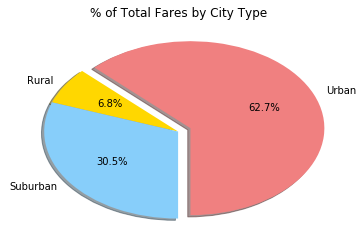

In [38]:

# Build Pie Chart
types_pie = ["Urban", "Rural", "Suburban"]
fares_pie = [urban_fares_percent, rural_fares_percent, suburban_fares_percent]
colors = ["lightcoral","gold","lightskyblue"]
explode = (0.1,0,0)
plt.pie(fares_pie, explode=explode, labels=types_pie, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Fares by City Type")
plt.savefig("Total_Fares_City_Type.png")
# Save Figure


## Total Rides by City Type

In [23]:
# Calculate Type Percents
types_total = combined_df["ride_id"].count()
urban_types_percent = (urban["ride_id"].count()/types_total)*100
rural_types_percent = (rural["ride_id"].count()/types_total)*100
suburban_types_percent = (suburban["ride_id"].count()/types_total)*100

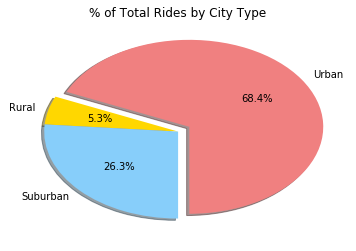

In [39]:
# Build Pie Chart
types_pie = ["Urban", "Rural", "Suburban"]
fares_pie = [urban_types_percent, rural_types_percent, suburban_types_percent]
colors = ["lightcoral","gold","lightskyblue"]
explode = (0.1,0,0)
plt.pie(fares_pie, explode=explode, labels=types_pie, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Rides by City Type")
plt.savefig("Total_Rides_City_Type.png")
# Save Figure


## Total Drivers by City Type

In [32]:
# drop duplicates for ride ID
urban_2 = urban.drop_duplicates(["city"])
rural_2 = rural.drop_duplicates(["city"])
suburban_2 = suburban.drop_duplicates(["city"])

In [33]:
# Calculate Driver Percents
drivers_total = combined_df["driver_count"].sum()
urban_drivers_percent = (urban_2["driver_count"].sum()/drivers_total)*100
rural_drivers_percent = (rural_2["driver_count"].sum()/drivers_total)*100
suburban_drivers_percent = (suburban_2["driver_count"].sum()/drivers_total)*100

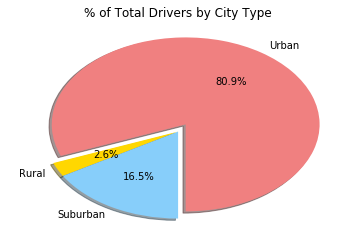

In [40]:
# Build Pie Chart
types_pie = ["Urban", "Rural", "Suburban"]
fares_pie = [urban_drivers_percent, rural_drivers_percent, suburban_drivers_percent]
colors = ["lightcoral","gold","lightskyblue"]
explode = (0.1,0,0)
plt.pie(fares_pie, explode=explode, labels=types_pie, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Drivers by City Type")
plt.savefig("Total_Drivers_City_Type.png")
# Save Figure
